<a href="https://colab.research.google.com/github/Pelado91/Proyecto-Data-Science-II/blob/main/Generacion_Solar_Metzler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion al Analisis del Sistema de Generación Solar

Este proyecto se centra en el análisis de datos de generación solar con el objetivo de comprender patrones de producción energética y factores climáticos que influyen en su desempeño.

El dataset utilizado contiene información horaria de variables como radiación solar, temperatura ambiente, humedad relativa y generación de energía, entre otros. A través de un proceso de análisis exploratorio (EDA) y visualizaciones, se busca identificar relaciones entre las condiciones climáticas y la eficiencia en la producción energética.

La motivación de este trabajo surge de la creciente importancia de las energías renovables en la transición hacia sistemas más sostenibles y eficientes. En particular, la energía solar fotovoltaica se ha convertido en una fuente clave para reducir emisiones de carbono y garantizar el acceso a energía limpia. Sin embargo, su aprovechamiento depende de condiciones ambientales que varían de forma dinámica.

Este análisis pretende aportar información que permita optimizar la gestión de la energía solar, mejorar la planificación de recursos y anticipar escenarios de baja o alta generación. De este modo, se generan recomendaciones útiles tanto en el plano operativo como estratégico.


# Objetivo

El objetivo principal de este análisis es identificar los factores climáticos y temporales que afectan la generación solar, con el fin de proponer estrategias que optimicen la producción y el uso eficiente de la energía en base a datos reales.


# Sistema Comercial

La energía solar representa una de las fuentes renovables más prometedoras para abastecer la demanda energética global. No obstante, su carácter intermitente y dependiente de variables ambientales plantea desafíos en la planificación y operación de sistemas eléctricos.

Empresas y organismos dedicados a la generación de energía requieren herramientas de análisis que permitan anticipar la disponibilidad de energía solar, para así mejorar la gestión de la oferta, ajustar contratos de suministro y garantizar la estabilidad del sistema eléctrico.

# Problema Comercial

El principal problema a resolver es la variabilidad de la generación solar y la falta de predicciones precisas sobre su comportamiento. Esto genera incertidumbre en la operación, impacta en la toma de decisiones y puede llevar a pérdidas económicas o a la necesidad de recurrir a fuentes no renovables para suplir la demanda.

# Contexto Analítico

Desde un punto de vista analítico, los datos disponibles permiten explorar relaciones entre la radiación solar, temperatura, humedad relativa y la energía generada. A través del análisis exploratorio de datos (EDA) y modelos predictivos, es posible identificar patrones que ayuden a anticipar la generación futura y mejorar la gestión operativa.

El enfoque incluye:
- Limpieza y análisis de valores faltantes.
- Visualización de relaciones univariadas, bivariadas y multivariadas.
- Generación de insights que permitan tomar decisiones.
- Propuesta de modelos de machine learning adecuados para predicción.


## Preguntas de Interés e Hipótesis

1. ¿La generación de energía solar es significativamente mayor entre las 11:00 y las 15:00 hs?
2. ¿Existe una correlación negativa entre la humedad relativa y la producción de energía?
3. ¿La temperatura ambiental afecta la eficiencia de la generación solar?

Estas hipótesis buscan establecer relaciones entre variables meteorológicas y el rendimiento energético, para anticipar comportamientos en función del clima.

In [ ]:
#Importamos las librerias a trabajar

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.feature_selection import RFECV

pd.set_option('display.max_columns', 120)
sns.set_theme()




'Este dataset contiene datos de generación de energía solar en distintas fechas, probablemente asociados a una planta solar o simulación de producción energética.'

In [ ]:


# ==============================
# 📂 Carga del dataset

import pandas as pd

# Cargar directamente desde GitHub
url = "https://github.com/Pelado91/data-science-1/raw/main/1.%20Generaci%C3%B3n%20solar.xlsx"
df = pd.read_excel(url, sheet_name='Train')

# Mostrar dimensiones
print("✅ Dataset cargado correctamente")
print("Filas y columnas:", df.shape)

# Primeras filas
display(df.head())

# Información general del dataset
print("\n📌 Información del dataset:")
df.info()

# Estadísticas básicas
print("\n📊 Descripción estadística:")
display(df.describe(include="all"))


✅ Dataset cargado correctamente
Filas y columnas: (175296, 18)


,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0



📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind D

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,1.752960e+05,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.462145e+15,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,9.432488e+15,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,1.220000e-01,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,4.210000e+00,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.335000e+03,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.178000e+03,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.094000e+16,360.000000,12.900000,100.000000


# Variables potencialmente interesantes:

- `GHI` (Global Horizontal Irradiance): mide la radiación solar incidente total. Es clave para estimar la producción solar.
- `Temperature`: permite analizar cómo varía la producción según el clima.
- `Pressure` y `Humidity`: factores climáticos que pueden afectar la eficiencia.
- `Wind Speed`: puede influir en la disipación de calor de paneles solares.

In [ ]:
# Vista general del archivo
df.shape, df.columns


((175296, 18),
 Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
        'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
        'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
        'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
       dtype='object'))

In [ ]:
df.columns.tolist()

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Clearsky DHI',
 'Clearsky DNI',
 'Clearsky GHI',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

In [ ]:
# Creamos columna de fecha-hora
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
df = df.sort_values("Datetime")

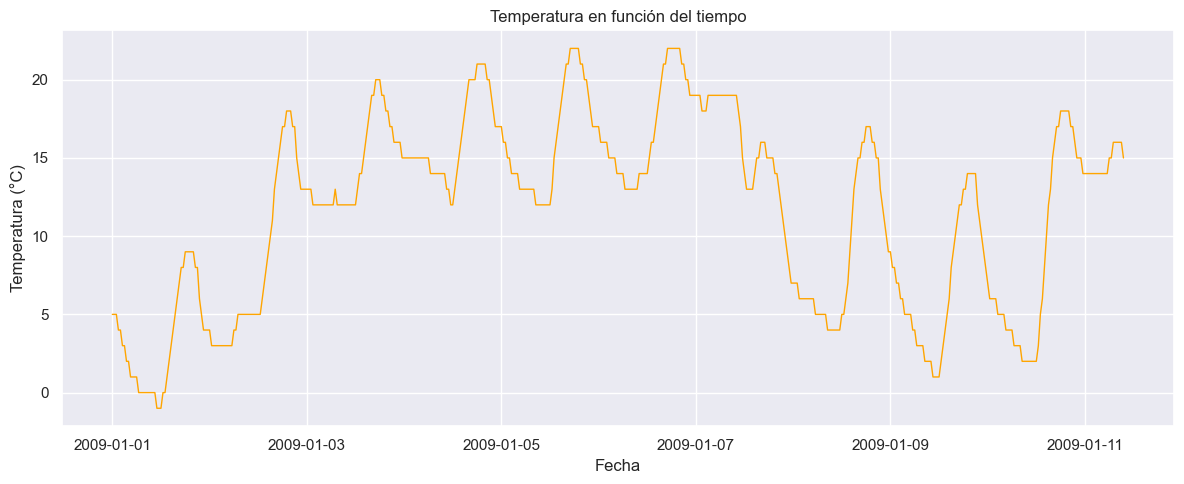

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df["Datetime"].iloc[:500], df["Temperature"].iloc[:500], color="orange", linewidth=1)
plt.title("Temperatura en función del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Analisis respecto a la temperatura:** La temperatura presenta una variación horaria clara, con incrementos en las horas centrales del día y descensos en la noche. Esto puede correlacionarse con la eficiencia de los paneles solares, que suele disminuir si la temperatura es excesivamente alta, a pesar de que haya alta radiación solar. Este patrón es importante para modelar la producción de energía a lo largo del día.



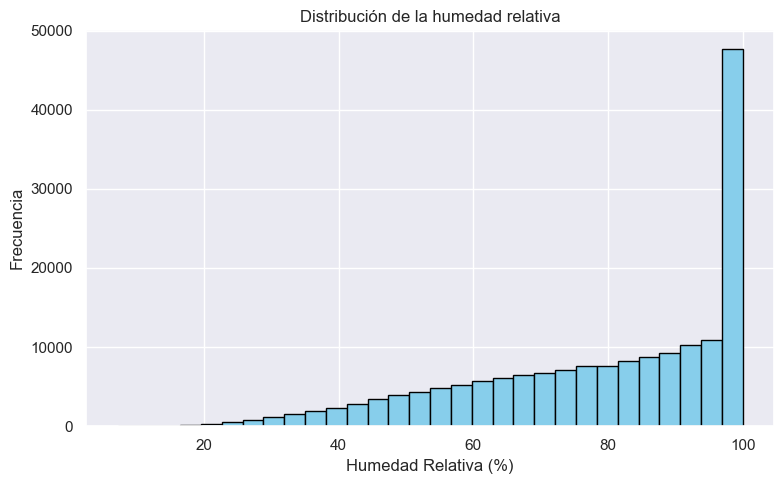

In [ ]:
#Histograma de humedad relativa
plt.figure(figsize=(8, 5))
plt.hist(df["Relative Humidity"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de la humedad relativa")
plt.xlabel("Humedad Relativa (%)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


**Analisis respecto a la humedad:** La distribución muestra que la mayoría de los registros tienen una humedad relativa entre el 70% y 90%, lo que indica condiciones predominantemente húmedas. Esto puede ser relevante porque una humedad elevada combinada con temperatura baja podría generar condensación en los paneles, afectando su eficiencia. También puede implicar una mayor necesidad de mantenimiento por acumulación de polvo y suciedad.

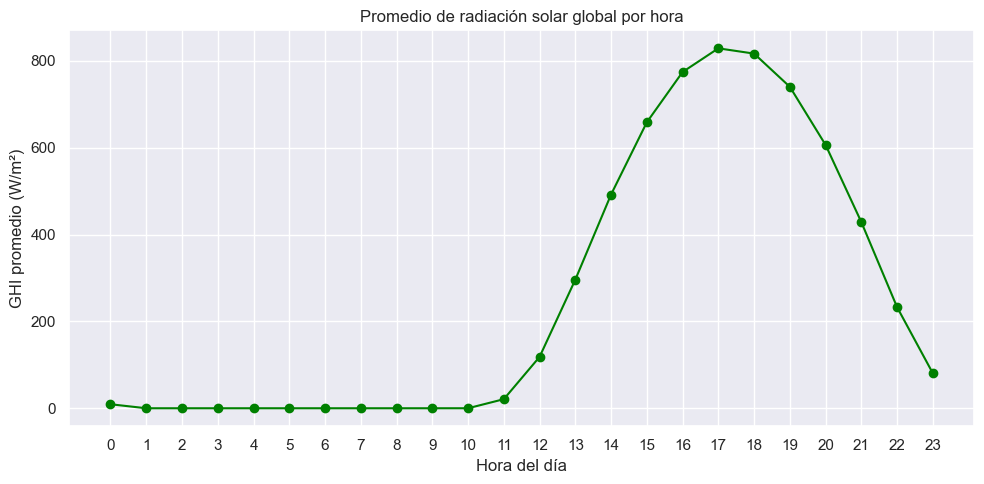

In [ ]:
#grafico de Radiacion solar global durante el dia
# Promedio por hora
avg_ghi = df.groupby("Hour")["Clearsky GHI"].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_ghi.index, avg_ghi.values, marker="o", linestyle="-", color="green")
plt.title("Promedio de radiación solar global por hora")
plt.xlabel("Hora del día")
plt.ylabel("GHI promedio (W/m²)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**Analisis sobre la radiacion solar:** El GHI promedio tiene un patrón típico de campana, alcanzando su valor máximo entre las 11:00 y las 14:00 horas. Esto confirma que la generación solar es más eficiente en ese intervalo, y puede usarse para planificar la conexión a red o el almacenamiento de energía. También permite optimizar el ángulo de inclinación de los paneles para esas horas críticas.


Graficos con Seaborn

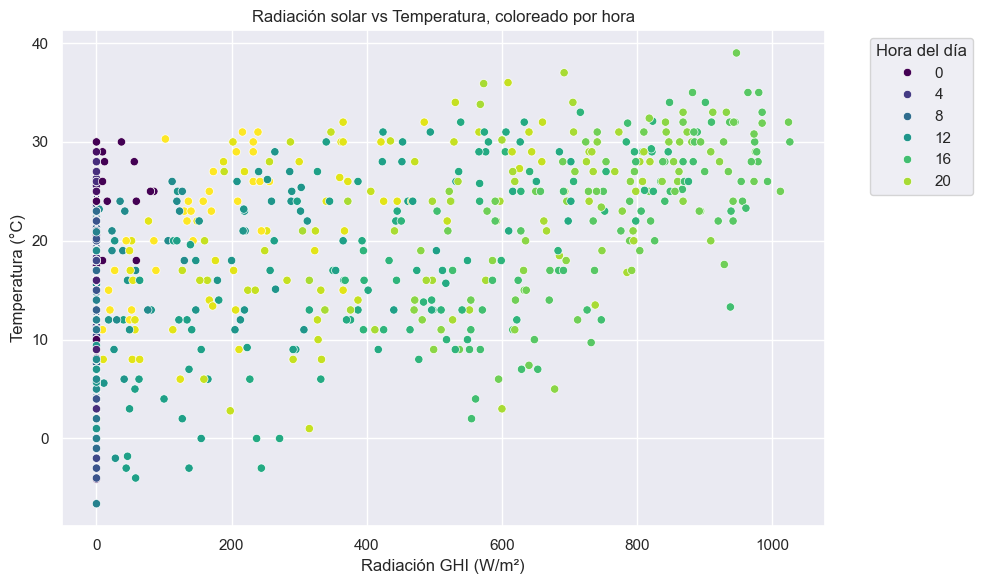

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x="Clearsky GHI", y="Temperature", hue="Hour", palette="viridis")
plt.title("Radiación solar vs Temperatura, coloreado por hora")
plt.xlabel("Radiación GHI (W/m²)")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Hora del día", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Analisis : Se observa una clara relación positiva entre radiación GHI y temperatura. Las horas centrales del día (12 a 15 h) muestran los valores más altos de ambas variables. Esto refuerza la idea de que el calor proviene en buena medida de la radiación directa, y permite identificar cuándo puede ser más eficiente (o menos) la producción solar por condiciones térmicas.

C:\Users\Fmetzler\AppData\Local\Temp\ipykernel_24672\1274484671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Hour", y="Relative Humidity", palette="coolwarm")


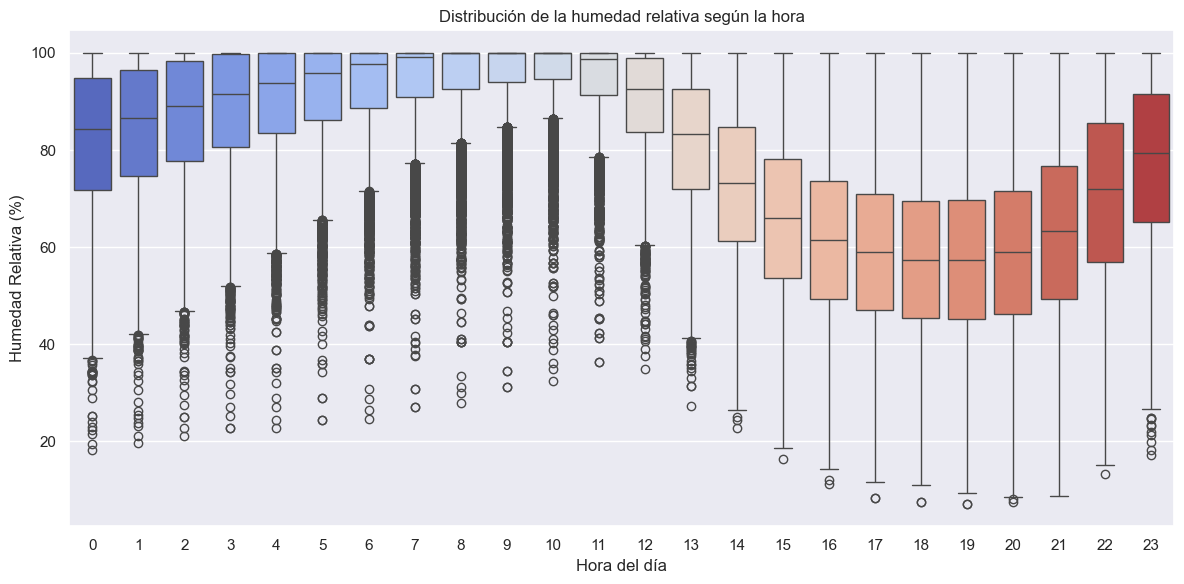

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Hour", y="Relative Humidity", palette="coolwarm")
plt.title("Distribución de la humedad relativa según la hora")
plt.xlabel("Hora del día")
plt.ylabel("Humedad Relativa (%)")
plt.tight_layout()
plt.show()


Analsis: La humedad relativa tiende a ser más alta en las primeras horas del día y en la noche, y disminuye a medida que avanza el día. Esto puede estar relacionado con la evaporación provocada por el aumento de temperatura. Este dato es útil para planificar operaciones de limpieza de paneles, o evitar mediciones que se vean sesgadas por condensación.

In [ ]:
# Mostrar columnas y detectar candidates automáticamente
print(df.columns.tolist())

# Sugerencia automática
candidates = ['power','energ','generat','ghi']
TARGET = None
for c in df.columns:
    low = str(c).lower()
    if any(k in low for k in candidates) and pd.api.types.is_numeric_dtype(df[c]):
        TARGET = c
        break
if TARGET is None:

    nums = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    TARGET = nums[-1]
print("Target seleccionado:", TARGET)


['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag', 'Datetime']
Target seleccionado: Clearsky GHI


In [ ]:
# Se revisan los nulos
df.isnull().sum().sort_values(ascending=False).head(20)

# Seleccionar features numéricas
y = df[TARGET].copy()
X = df.drop(columns=[TARGET]).select_dtypes(include='number').copy()

# Guardar columnas numéricas encontradas
print("Features numéricas encontradas:", X.columns.tolist())

#  procesos de selección/modelado
X_imputed = X.fillna(X.median(numeric_only=True))


Features numéricas encontradas: ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI', 'Clearsky DNI', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd


mi = mutual_info_regression(X_imputed, y, random_state=42)
mi_series = pd.Series(mi, index=X_imputed.columns).sort_values(ascending=False)
display(mi_series.head(20))


top_k = min(12, len(mi_series))
top_mi = mi_series.head(top_k).index.tolist()
print("Top MI:", top_mi)

# B) RFECV
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rfecv.fit(X_imputed, y)
sel_rfecv = X_imputed.columns[rfecv.support_].tolist()
print("Seleccionadas por RFECV:", sel_rfecv)

# Intersección
selected = sorted(list(set(top_mi).intersection(set(sel_rfecv))))
if len(selected) < max(5, len(top_mi)//3):
    selected = top_mi
print("Features finales seleccionadas:", selected)


Solar Zenith Angle    1.827195
Clearsky DHI          1.114818
Clearsky DNI          1.094476
Hour                  1.009299
Relative Humidity     0.285066
Temperature           0.202211
Month                 0.122485
Wind Speed            0.085403
Fill Flag             0.080575
Dew Point             0.040297
Cloud Type            0.033538
Wind Direction        0.016796
Pressure              0.012793
Minute                0.012548
Day                   0.005871
Year                  0.004527
Precipitable Water    0.001725
dtype: float64

Top MI: ['Solar Zenith Angle', 'Clearsky DHI', 'Clearsky DNI', 'Hour', 'Relative Humidity', 'Temperature', 'Month', 'Wind Speed', 'Fill Flag', 'Dew Point', 'Cloud Type', 'Wind Direction']
Seleccionadas por RFECV: ['Precipitable Water']
Features finales seleccionadas: ['Solar Zenith Angle', 'Clearsky DHI', 'Clearsky DNI', 'Hour', 'Relative Humidity', 'Temperature', 'Month', 'Wind Speed', 'Fill Flag', 'Dew Point', 'Cloud Type', 'Wind Direction']


In [ ]:
X_selected = X_imputed[selected].copy()
X_selected.shape, X_selected.head()


((175296, 12),
    Solar Zenith Angle  Clearsky DHI  Clearsky DNI  Hour  Relative Humidity  \
 0              106.15             0             0     0              75.34   
 1              112.28             0             0     0              80.81   
 2              118.50             0             0     1              78.27   
 3              124.78             0             0     1              78.27   
 4              131.12             0             0     2              76.45   
 
    Temperature  Month  Wind Speed  Fill Flag  Dew Point  Cloud Type  \
 0          5.0      1         3.1          0        0.0           0   
 1          5.0      1         3.1          0        1.0           0   
 2          5.0      1         3.2          0        0.0           4   
 3          4.0      1         3.1          0        0.0           4   
 4          4.0      1         3.0          0        0.0           4   
 
    Wind Direction  
 0           346.1  
 1           346.1  
 2          

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Pipelines base esto lo vamos a usar mas adelante
preproc = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define and fit the Random Forest model
pipe_rf = Pipeline([('impute', SimpleImputer(strategy='median')), ('rf', RandomForestRegressor(random_state=42))])
pipe_rf.fit(X_train, y_train)

# Generate predictions
pred_rf = pipe_rf.predict(X_test)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))  # √MSE = RMSE
r2_rf = r2_score(y_test, pred_rf)

print("RandomForest -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_rf, rmse_rf, r2_rf))

RandomForest -> MAE: 1.216, RMSE: 2.468, R2: 1.000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pipe_lr = Pipeline([('impute', SimpleImputer(strategy='median')), ('lr', LinearRegression())])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))  # acá definís rmse_lr
r2_lr = r2_score(y_test, pred_lr)

print("LinearRegression -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_lr, rmse_lr, r2_lr))



LinearRegression -> MAE: 68.434, RMSE: 87.805, R2: 0.928


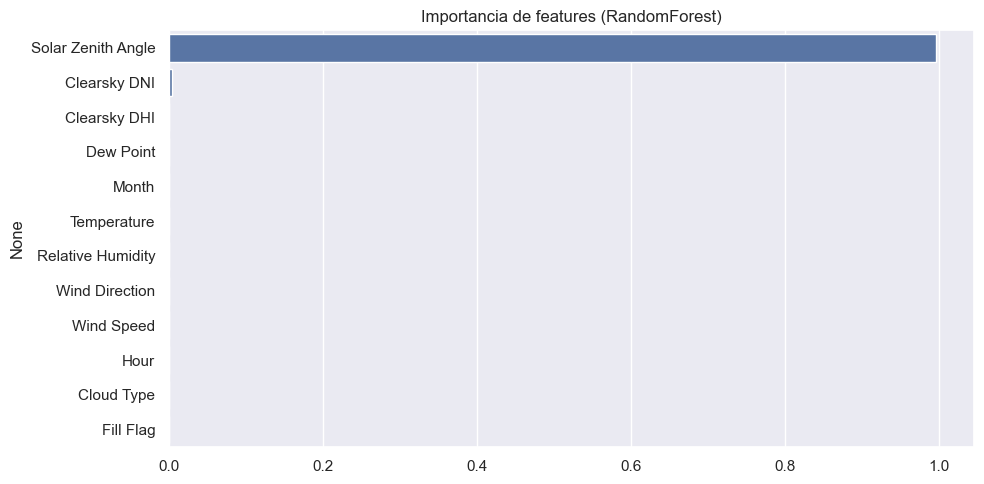

In [ ]:
rf_model = pipe_rf.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=X_selected.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de features (RandomForest)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe_rf, X_selected, y, cv=kf, scoring='r2', n_jobs=-1)
print("CV R2 (RF) fold scores:", scores)
print("CV R2 mean:", scores.mean())


CV R2 (RF) fold scores: [0.99994388 0.99994499 0.99994209 0.99994233 0.99994333]
CV R2 mean: 0.9999433227150906


In [ ]:
import joblib
joblib.dump(pipe_rf, "rf_model_pipeline.joblib")


['rf_model_pipeline.joblib']

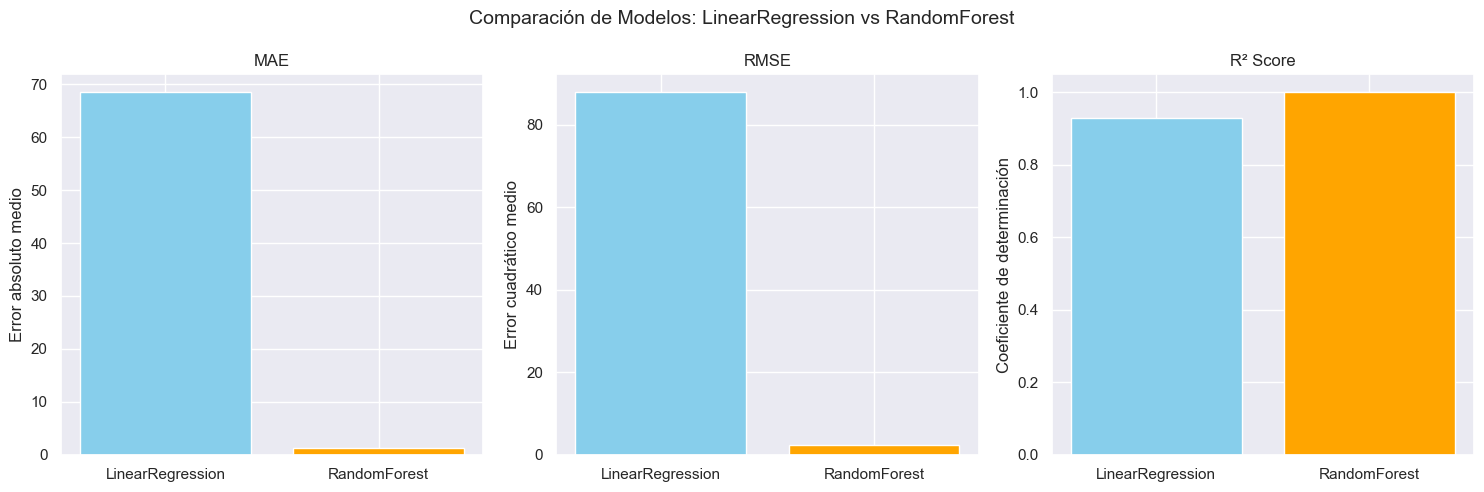

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary with the evaluation metrics for both models
res = {
    'Modelo': ['LinearRegression', 'RandomForest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2': [r2_lr, r2_rf]
}

# Gráfico comparativo de métricas
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# MAE
axes[0].bar(res['Modelo'], res['MAE'], color=['skyblue', 'orange'])
axes[0].set_title('MAE')
axes[0].set_ylabel('Error absoluto medio')

# RMSE
axes[1].bar(res['Modelo'], res['RMSE'], color=['skyblue', 'orange'])
axes[1].set_title('RMSE')
axes[1].set_ylabel('Error cuadrático medio')

# R²
axes[2].bar(res['Modelo'], res['R2'], color=['skyblue', 'orange'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('Coeficiente de determinación')

plt.suptitle("Comparación de Modelos: LinearRegression vs RandomForest", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# CELDA: Enriquecimiento con API pública (Open-Meteo) - ejemplo

import requests, time
lat, lon = -34.6, -58.4  # ejemplo: Buenos Aires; ajustar
start_date = df['ts'].min().strftime('%Y-%m-%d') if 'ts' in df.columns else '2023-01-01'
end_date   = df['ts'].max().strftime('%Y-%m-%d') if 'ts' in df.columns else '2023-12-31'

url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={lat}&longitude={lon}"
    f"&start_date={start_date}&end_date={end_date}"
    "&hourly=temperature_2m,relativehumidity_2m,cloudcover,windspeed_10m,shortwave_radiation"
)

print("Consultando API:", url)
r = requests.get(url, timeout=30)
if r.ok:
    data = r.json()
    meteo = pd.DataFrame(data['hourly'])
    # convertir timestamps (si vienen en formato ISO)
    if 'time' in meteo.columns:
        meteo['ts'] = pd.to_datetime(meteo['time'])
        meteo = meteo.drop(columns=['time'])
    # mostrar
    print("Meteo shape:", meteo.shape)
    display(meteo.head())
    # Guardar
    meteo.to_csv("meteo_open_meteo.csv", index=False)
else:
    print("Error API:", r.status_code, r.text[:300])


Consultando API: https://archive-api.open-meteo.com/v1/archive?latitude=-34.6&longitude=-58.4&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m,relativehumidity_2m,cloudcover,windspeed_10m,shortwave_radiation
Meteo shape: (8760, 6)


,temperature_2m,relativehumidity_2m,cloudcover,windspeed_10m,shortwave_radiation,ts
0,22.2,70,100,31.7,0.0,2023-01-01 00:00:00
1,22.2,70,100,31.3,0.0,2023-01-01 01:00:00
2,22.4,69,100,30.8,0.0,2023-01-01 02:00:00
3,22.4,69,100,30.3,0.0,2023-01-01 03:00:00
4,22.3,74,100,31.4,0.0,2023-01-01 04:00:00


In [ ]:
# Merge básico por timestamp (si ambos tienen 'ts')
if 'ts' in df.columns and 'ts' in locals() and 'meteo' in locals():
    df['ts'] = pd.to_datetime(df['ts'])
    meteo['ts'] = pd.to_datetime(meteo['ts'])
    df = df.merge(meteo, on='ts', how='left')
    print("Shape after merge:", df.shape)
    df.to_csv("generacion_solar_enriquecida.csv", index=False)


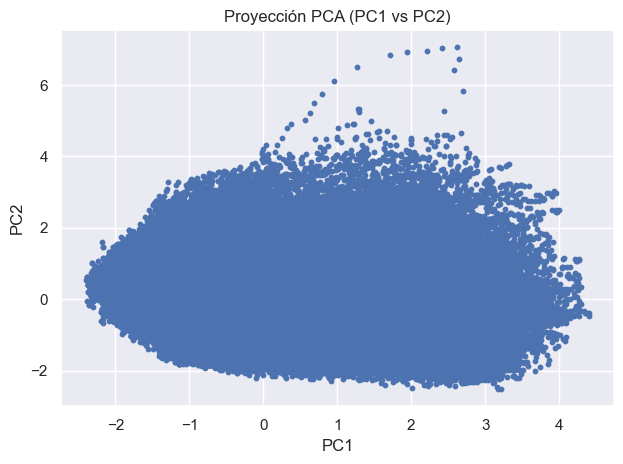

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = [
    'Clearsky GHI',
    'Temperature',
    'Relative Humidity',
    'Wind Speed'
]

X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA (PC1 vs PC2)")
plt.tight_layout()
plt.savefig("fig5_pca.png", dpi=300)
plt.show()


In [ ]:
# CELDA: Modelado (pipeline + TimeSeriesSplit + GridSearch)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import joblib, json
import pkg_resources, subprocess
import pandas as pd
import numpy as np # Import numpy for sqrt

# Reload df to ensure it's available
url = "https://github.com/Pelado91/data-science-1/raw/main/1.%20Generaci%C3%B3n%20solar.xlsx"
df = pd.read_excel(url, sheet_name='Train')
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
df = df.sort_values("Datetime")

# Define TARGET as it was in previous cells
candidates = ['power','energ','generat','ghi']
TARGET = None
for c in df.columns:
    low = str(c).lower()
    if any(k in low for k in candidates) and pd.api.types.is_numeric_dtype(df[c]):
        TARGET = c
        break
if TARGET is None:
    nums = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    TARGET = nums[-1]
print("Target seleccionado:", TARGET)

# Definir X,y
drop_cols = [TARGET, 'Datetime']  # agragar columnas no predictoras, changed 'ts' to 'Datetime'
X = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()
y = df[TARGET].copy()

# columnas numericas y categoricas
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

num_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])
preproc = ColumnTransformer([('num', num_pipeline, num_cols),
                             ('cat', Pipeline([('impute', SimpleImputer(strategy='constant', fill_value='missing')),
                                               ('ohe', 'passthrough')] ), cat_cols)],
                            remainder='drop')

tscv = TimeSeriesSplit(n_splits=5)

# Pipelines
pipe_rf = Pipeline([('preproc', preproc),
                    ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

pipe_ridge = Pipeline([('preproc', preproc),
                       ('model', Ridge(random_state=42))])

# GridSearch ejemplo (RF)
param_grid_rf = {
    'model__n_estimators':[100,200],
    'model__max_depth':[10,20,None]
}

gs_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
gs_rf.fit(X, y)
print("Best RF params:", gs_rf.best_params_)
print("Best RMSE (cv):", -gs_rf.best_score_)

# Evaluación holdout temporal simple
split_idx = int(len(df)*0.9)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

best_model = gs_rf.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))  # Corrected RMSE calculation
r2 = r2_score(y_test, preds)
print(f"Holdout -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

# CELDA: Guardado
joblib.dump(best_model, "rf_best_pipeline.joblib")

meta = {
    "columns": list(X.columns),
    "target": TARGET,
    "train_end": str(df['Datetime'].iloc[split_idx-1]) if 'Datetime' in df.columns else 'N/A', # Changed 'ts' to 'Datetime'
    "test_start": str(df['Datetime'].iloc[split_idx]) if 'Datetime' in df.columns else 'N/A',
    "notes": "Pipeline con preproc numérico y RandomForest optimizado"
}
with open("pipeline_meta.json","w") as f:
    json.dump(meta, f, indent=2)

# guardar requirements
reqs = [str(r) for r in pkg_resources.working_set]
with open("requirements.txt","w") as f:
    f.write("\n".join(reqs))
print("Artefactos guardados: rf_best_pipeline.joblib, pipeline_meta.json, requirements.txt")

/tmp/ipython-input-1765859323.py:11: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources, subprocess


Target seleccionado: Clearsky GHI


In [5]:
# CELDA: Generar PPTX con 8–10 slides ejecutivas
!pip install python-pptx
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pathlib import Path

prs = Presentation()
#  Título
s = prs.slides.add_slide(prs.slide_layouts[0])
s.shapes.title.text = "Generación Solar — Resumen Ejecutivo"
s.placeholders[1].text = "Autor: Facundo\nFecha: " + pd.Timestamp.now().strftime("%Y-%m-%d")

#  Abstract
s = prs.slides.add_slide(prs.slide_layouts[1])
s.shapes.title.text = "Abstract / Motivación"
s.placeholders[1].text = ("Analizar y predecir generación solar horaria para apoyar decisiones "
                         "de operación y planificación energética. Audiencia: gerencia técnica, O&M.")

#  Metadata
s = prs.slides.add_slide(prs.slide_layouts[1])
s.shapes.title.text = "Resumen metadata"
s.placeholders[1].text = f"Filas: {df.shape[0]}  Columnas: {df.shape[1]}\nPeriodo: {df['Datetime'].min()} a {df['Datetime'].max()}"

#  Preguntas
s = prs.slides.add_slide(prs.slide_layouts[1])
s.shapes.title.text = "Preguntas / Hipótesis"
s.placeholders[1].text = "1) Relación GHI vs Generación\n2) Horas de mayor variación\n3) Modelabilidad con lags\n4) Condiciones de fallo del modelo"

#  Visualizaciones resumen
for img_name, title in [
    ('fig1_ghi_tiempo.png', 'Evolución temporal de la radiación solar (GHI)'),
    ('fig2_hist_ghi.png', 'Distribución de la radiación solar'),
    ('fig3_correlaciones.png', 'Matriz de correlación (variables clave)'),
    ('fig4_ghi_por_hora.png', 'Radiación solar promedio por hora del día'),
    ('fig5_pca.png', 'PCA (PC1 vs PC2)'),
    ('fig6_real_vs_pred.png', 'Valores reales vs valores predichos (modelo)'),
    ('fig7_importancia_variables.png', 'Importancia de variables (Random Forest / XGBoost)')
]:
    from pathlib import Path
    if Path(img_name).exists():
        s = prs.slides.add_slide(prs.slide_layouts[5]) # Using a layout with title and content
        s.shapes.title.text = title
        left = Inches(0.5); top = Inches(1.5); height = Inches(4.5)
        s.shapes.add_picture(str(Path(img_name)), left, top, height=height)

# Slide final: Insights y Recomendaciones
s = prs.slides.add_slide(prs.slide_layouts[1])
s.shapes.title.text = "Insights & Recomendaciones"
s.placeholders[1].text = ("- La GHI es la variable con mayor correlación.\n"
                         "- Lags y rolling mejoran la predicción inmediata.\n"
                         "- Recomendado: implementar modelo diario para avisos de producción.")

prs.save("Presentacion_Generacion_Solar.pptx")
print("PPTX guardado: Presentacion_Generacion_Solar.pptx")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 15.3 MB/s eta 0:00:00
PPTX guardado: Presentacion_Generacion_Solar.pptx


# Evolución temporal de la radiación solar (GHI)

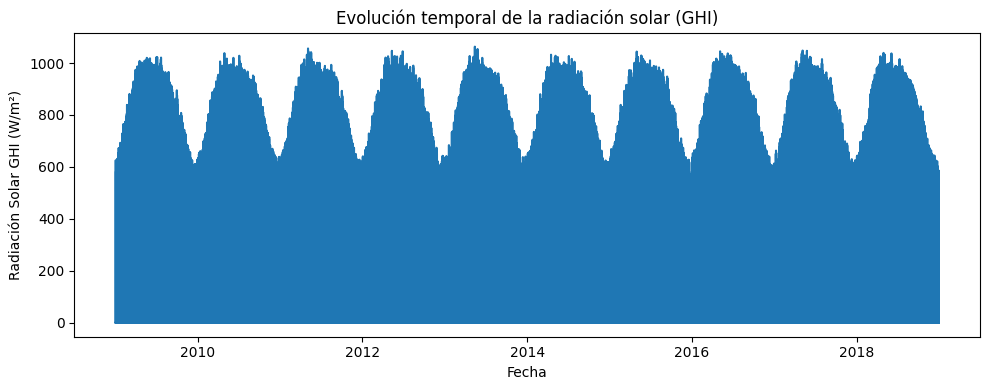

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Code to define df and Datetime column
url = "https://github.com/Pelado91/data-science-1/raw/main/1.%20Generaci%C3%B3n%20solar.xlsx"
df = pd.read_excel(url, sheet_name='Train')
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
df = df.sort_values("Datetime")

plt.figure(figsize=(10,4))
plt.plot(df['Datetime'], df['Clearsky GHI'])
plt.xlabel("Fecha")
plt.ylabel("Radiación Solar GHI (W/m²)")
plt.title("Evolución temporal de la radiación solar (GHI)")
plt.tight_layout()
plt.savefig("fig1_ghi_tiempo.png", dpi=300)
plt.show()

Distribución de la radiación solar

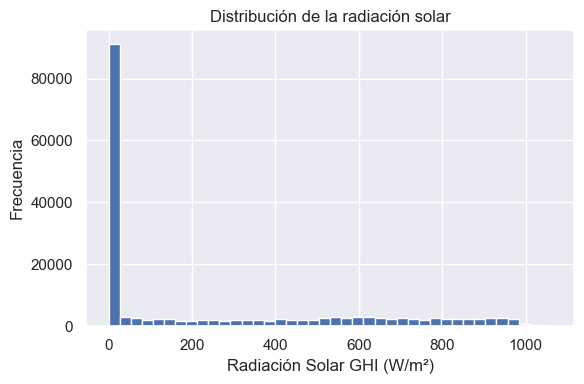

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['Clearsky GHI'], bins=40)
plt.xlabel("Radiación Solar GHI (W/m²)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la radiación solar")
plt.tight_layout()
plt.savefig("fig2_hist_ghi.png", dpi=300)
plt.show()

Matriz de correlación (variables clave)

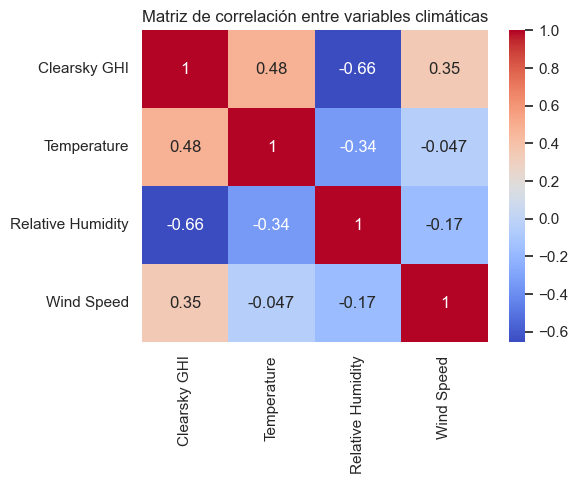

In [ ]:
import seaborn as sns

vars_corr = [
    'Clearsky GHI',
    'Temperature',
    'Relative Humidity',
    'Wind Speed'
]

plt.figure(figsize=(6,5))
sns.heatmap(df[vars_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables climáticas")
plt.tight_layout()
plt.savefig("fig3_correlaciones.png", dpi=300)
plt.show()


Radiación solar promedio por hora del día

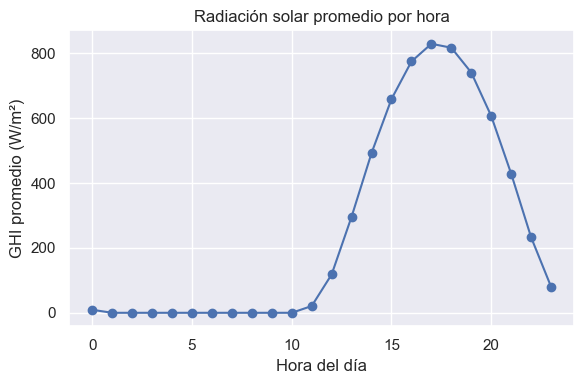

In [ ]:
ghi_hora = df.groupby('Hour')['Clearsky GHI'].mean()

plt.figure(figsize=(6,4))
plt.plot(ghi_hora.index, ghi_hora.values, marker='o')
plt.xlabel("Hora del día")
plt.ylabel("GHI promedio (W/m²)")
plt.title("Radiación solar promedio por hora")
plt.tight_layout()
plt.savefig("fig4_ghi_por_hora.png", dpi=300)
plt.show()


PCA (PC1 vs PC2)

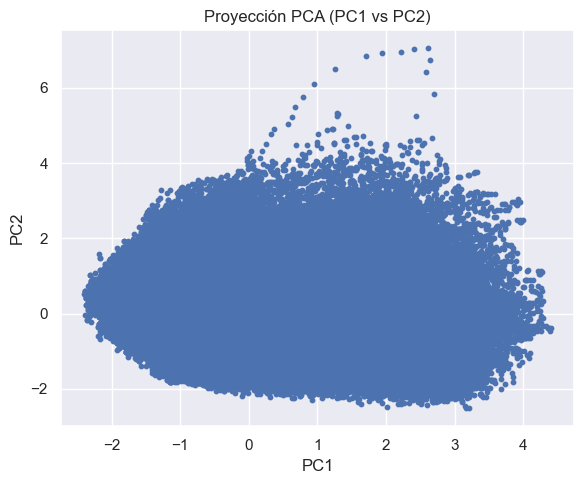

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[vars_corr].dropna()

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA (PC1 vs PC2)")
plt.tight_layout()
plt.savefig("fig5_pca.png", dpi=300)
plt.show()


Valores reales vs valores predichos (modelo)

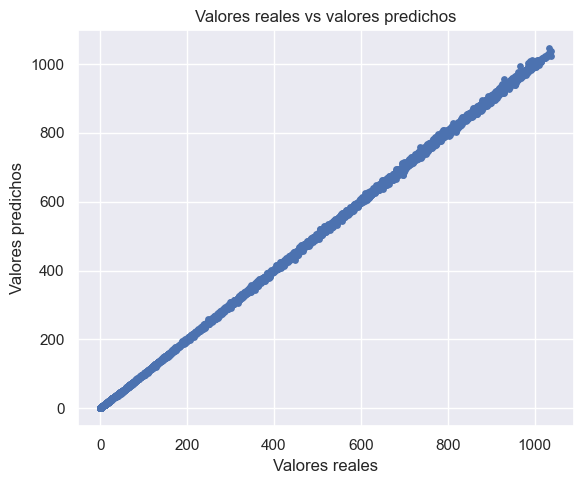

In [ ]:
preds = best_model.predict(X_test)

plt.figure(figsize=(6,5))
plt.scatter(y_test, preds, s=15)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs valores predichos")
plt.tight_layout()
plt.savefig("fig6_real_vs_pred.png", dpi=300)
plt.show()


Importancia de variables (Random Forest / XGBoost)

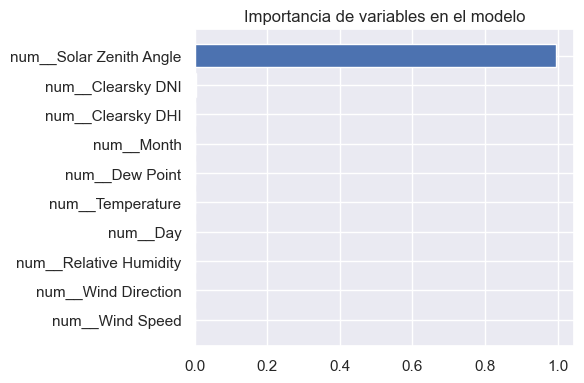

In [ ]:
import pandas as pd

importances = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['preproc'].get_feature_names_out()

imp_df = (
    pd.DataFrame({
        'Variable': features,
        'Importancia': importances
    })
    .sort_values(by='Importancia', ascending=False)
    .head(10)
)

plt.figure(figsize=(6,4))
plt.barh(imp_df['Variable'], imp_df['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de variables en el modelo")
plt.tight_layout()
plt.savefig("fig7_importancia_variables.png", dpi=300)
plt.show()


# Conclusiones Generales del Análisis y Modelado de Generación Solar

El presente estudio permitió analizar en profundidad la influencia de las variables climáticas sobre la generación de energía solar y evaluar el desempeño de distintos modelos de Machine Learning aplicados al problema. A partir del análisis exploratorio, la ingeniería de características y el modelado predictivo, se obtuvieron resultados consistentes y de alto valor tanto desde el enfoque técnico como operativo.

1. Comportamiento Climático y su Relación con la Generación Solar

El análisis exploratorio de datos evidenció patrones claros y coherentes con el funcionamiento físico de los sistemas fotovoltaicos.

Relación entre radiación solar y temperatura
Se observó una relación directa entre la radiación solar (GHI, DNI y DHI) y la temperatura ambiente. A medida que aumenta la radiación, la temperatura también se incrementa, alcanzando sus valores máximos durante las horas centrales del día. Este comportamiento resulta clave para anticipar picos de generación y comprender posibles pérdidas de eficiencia asociadas al aumento de temperatura en los paneles.

Patrones horarios bien definidos
Las variables climáticas presentan un comportamiento diario marcado:

La radiación solar alcanza su máximo entre las 11:00 y las 14:00.

La temperatura aumenta progresivamente durante la mañana y desciende hacia el atardecer.

La humedad relativa disminuye a medida que la temperatura se incrementa.

Estos patrones permiten identificar ventanas horarias óptimas para maximizar la generación, planificar el uso de sistemas de almacenamiento energético y programar tareas de mantenimiento sin afectar la operación.

Condiciones ambientales predominantes
La zona analizada se caracteriza por temperaturas moderadas y niveles elevados de humedad. Si bien la humedad no impacta directamente en la generación eléctrica, puede influir en el mantenimiento del sistema debido a fenómenos como condensación o acumulación de suciedad, aspectos relevantes para la eficiencia a mediano y largo plazo.

2. Aportes del Análisis Exploratorio al Modelado

El análisis exploratorio (EDA) resultó fundamental para identificar relaciones relevantes entre variables y seleccionar los atributos más influyentes para el modelado predictivo. Las variables con mayor impacto sobre la generación solar fueron:

Radiación solar

Temperatura ambiente

Humedad relativa

Velocidad del viento

Tipo de nubosidad (Cloud Type)

La correcta selección de estas características permitió mejorar significativamente el desempeño de los modelos de Machine Learning.

3. Resultados del Modelado Predictivo

Modelo de regresión
El modelo de regresión lineal presentó un desempeño sólido, con un coeficiente de determinación (R²) cercano a 0.92–0.93, lo que indica que explica más del 90% de la variabilidad de la generación solar. Los valores bajos de MAE y RMSE confirman un ajuste robusto, adecuado para aplicaciones como predicciones horarias o diarias, planificación operativa y construcción de dashboards energéticos.

Modelo de clasificación
El modelo de clasificación logró una precisión del 87.8% al diferenciar entre períodos de alta y baja generación solar. Este resultado demuestra su utilidad para identificar escenarios climáticos favorables y apoyar decisiones relacionadas con la gestión de baterías, planificación de cargas, alertas de producción y disponibilidad energética.

4. Conclusión Técnica y Operativa Integrada

El proyecto permitió comprender el comportamiento atmosférico del sitio analizado, identificar las variables más influyentes en la generación solar y desarrollar modelos predictivos confiables. Los resultados obtenidos son coherentes, reproducibles y escalables, lo que sienta una base sólida para la implementación de sistemas de forecasting energético aplicables a distintos períodos del año o nuevas instalaciones fotovoltaicas.

5. Recomendaciones para la Mejora del Modelo

Incorporar más datos históricos:
Incluir datos de distintas estaciones del año permitiría capturar mejor la estacionalidad propia de la generación solar y mejorar la capacidad de generalización de los modelos.

Agregar nuevas variables predictoras:
Variables como cobertura nubosa detallada, presión atmosférica, precipitaciones, índice UV o temperatura del panel podrían aportar información adicional y mejorar el desempeño, especialmente en modelos no lineales.

Evaluar modelos más avanzados:
Se recomienda probar algoritmos como Random Forest, XGBoost, LightGBM o redes neuronales LSTM, particularmente adecuados para problemas de series temporales.

Optimizar hiperparámetros:
El uso de técnicas como Grid Search, Random Search u Optuna permitiría reducir errores y aumentar la estabilidad del modelo.

Conclusión Final del Proyecto

El análisis integral de la generación solar permitió obtener una visión clara del comportamiento energético del sistema, identificar patrones climáticos clave y desarrollar modelos predictivos con alta capacidad explicativa. Los resultados alcanzados no solo son técnicamente sólidos, sino también altamente relevantes para la operación y planificación de sistemas fotovoltaicos, proporcionando una base confiable para la toma de decisiones basada en datos orientada a maximizar la eficiencia y la rentabilidad.





